In [187]:
## Loading libraries
import pandas as pd    ## for data manipulation
import numpy as np     ## for array and matrices operations
import bokeh   ## For interactive visualizations
import matplotlib.pyplot as plt 
import os
import geopandas as gpd                 # For plotting maps
from bokeh.plotting import figure, show  # For interactive visualization
from bokeh.io import output_notebook

In [188]:
data = pd.read_csv('india_2011.csv')

In [189]:
data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU & KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU & KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU & KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU & KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU & KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [190]:
# understanding the data 

for i in data.columns:
    print('{}: {}\n'.format(i, data[i].dtype))

District code: int64

State name: object

District name: object

Population: int64

Male: int64

Female: int64

Literate: int64

Male_Literate: int64

Female_Literate: int64

SC: int64

Male_SC: int64

Female_SC: int64

ST: int64

Male_ST: int64

Female_ST: int64

Workers: int64

Male_Workers: int64

Female_Workers: int64

Main_Workers: int64

Marginal_Workers: int64

Non_Workers: int64

Cultivator_Workers: int64

Agricultural_Workers: int64

Household_Workers: int64

Other_Workers: int64

Hindus: int64

Muslims: int64

Christians: int64

Sikhs: int64

Buddhists: int64

Jains: int64

Others_Religions: int64

Religion_Not_Stated: int64

LPG_or_PNG_Households: int64

Housholds_with_Electric_Lighting: int64

Households_with_Internet: int64

Households_with_Computer: int64

Rural_Households: int64

Urban_Households: int64

Households: int64

Below_Primary_Education: int64

Primary_Education: int64

Middle_Education: int64

Secondary_Education: int64

Higher_Education: int64

Graduate_Educa

In [191]:
# list of all the categorical and numerical variables
cat_var = [i for i in data.columns if data[i].dtype==object]


In [192]:
cat_var

['State name', 'District name']

In [193]:
data[cat_var[0]] = data[cat_var[0]].astype('category')
data[cat_var[1]] = data[cat_var[1]].astype('category')

Calculating the literacy rate statewise

In [194]:
# calculate total number of literate people statewise
lit_pop = data.groupby('State name')['Literate'].agg('sum')
tot_pop = data.groupby('State name')['Population'].agg('sum')

In [195]:
lit_rate = (lit_pop/tot_pop)*100

In [196]:
## Printing top 10 states with lowest literacy rate

lit_rate.sort_values().head(10)

State name
BIHAR                50.436916
ARUNACHAL PRADESH    55.358102
JHARKHAND            55.559581
RAJASTHAN            55.836841
JAMMU & KASHMIR      56.351669
UTTAR PRADESH        57.252497
MADHYA PRADESH       59.001861
ANDHRA PRADESH       59.773345
MEGHALAYA            60.164199
CHHATTISGARH         60.206705
dtype: float64

In [197]:
data.count()

District code                                                 640
State name                                                    640
District name                                                 640
Population                                                    640
Male                                                          640
Female                                                        640
Literate                                                      640
Male_Literate                                                 640
Female_Literate                                               640
SC                                                            640
Male_SC                                                       640
Female_SC                                                     640
ST                                                            640
Male_ST                                                       640
Female_ST                                                     640
Workers   

In [198]:
data2 = data[['Households_with_Telephone_Mobile_Phone_Mobile_only','Agricultural_Workers']]

In [199]:
data2.head()

,Households_with_Telephone_Mobile_Phone_Mobile_only,Agricultural_Workers
0,53437,56759
1,65783,36630
2,6331,1645
3,7733,3763
4,31773,31583


In [200]:
# Visualising the scatter plot between mobile penetrations and Agricultural_workers
y = data2['Households_with_Telephone_Mobile_Phone_Mobile_only'].values
x = data2['Agricultural_Workers'].values
p = figure(title="Mobile penetration among agricultural workers",toolbar_location=None)
p.grid.grid_line_color = None
p.scatter(x, y,marker='circle',fill_color='firebrick',
         line_color='red',alpha=0.8)
output_notebook()
show(p)

Loading BokehJS ...

In [201]:
show(p)

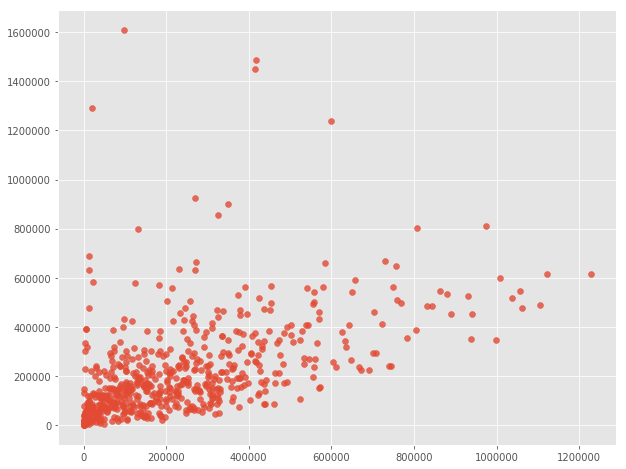

In [202]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])
plt.figure(figsize=(10,8))
# Visualising the scatter plot between mobile penetrations and Agricultural_workers
y = data2['Households_with_Telephone_Mobile_Phone_Mobile_only'].values
x = data2['Agricultural_Workers'].values
#plt = figure(title="Mobile penetration among agricultural workers",toolbar_location=None)
#plt.grid.grid_line_color = None
plt.scatter(x, y,alpha=0.8)
plt.show()

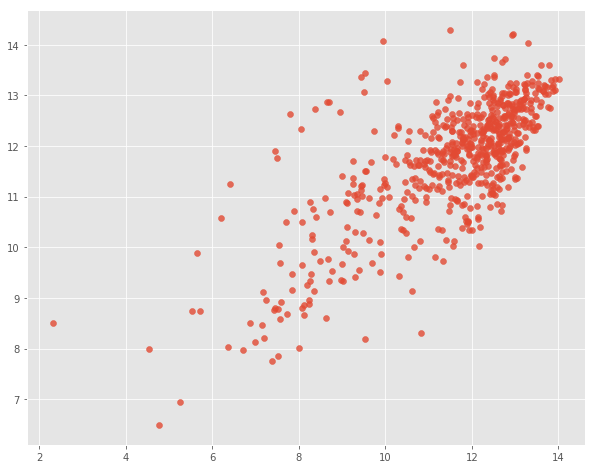

In [203]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])
plt.figure(figsize=(10,8))
# Visualising the scatter plot between mobile penetrations and Agricultural_workers
y = data2['Households_with_Telephone_Mobile_Phone_Mobile_only'].values
x = data2['Agricultural_Workers'].values
#plt = figure(title="Mobile penetration among agricultural workers",toolbar_location=None)
#plt.grid.grid_line_color = None
plt.scatter(np.log(x+10),np.log(y),alpha=0.8)
plt.show()

In [204]:
min(y)

662

In [205]:
min(x)

0

In [206]:
data['Agricultural_Workers'].mean()

225551.32656250001

In [207]:
data['Agricultural_Workers'].sort_values()

586          0
635         82
256        106
259        181
637        242
93         275
493        291
494        481
24         572
94         601
251        804
287        957
246       1063
268       1259
284       1284
267       1309
249       1384
244       1581
2         1645
54        1687
245       1705
90        1791
253       1811
248       1846
247       1859
638       1915
272       1924
254       1968
269       2198
240       2262
        ...   
344     702304
409     708993
220     721629
515     730228
509     739718
210     745015
553     748093
533     756859
539     758092
215     769001
235     783505
540     804537
342     806562
606     832213
332     842294
538     863131
552     879537
548     889218
537     931084
498     937174
206     940642
334     973182
202     998833
546    1006976
551    1037302
203    1057417
545    1061787
343    1105201
544    1122046
547    1227956
Name: Agricultural_Workers, Length: 640, dtype: int64

In [208]:
data['Households_with_Telephone_Mobile_Phone_Mobile_only'][586]

4977

In [209]:
data['Households_with_Telephone_Mobile_Phone_Mobile_only'].max()

1609899

In [210]:
data['Agricultural_Workers'].max()

1227956

In [211]:
data['Agricultural_Workers'].idxmax()

547

In [212]:
data['Households_with_Telephone_Mobile_Phone_Mobile_only'].idxmax()

571

In [213]:
data['Agricultural_Workers'][571]

97914

In [214]:
np.log(10)

2.3025850929940459

In [215]:
df = data[['Agricultural_Workers','Households_with_Telephone_Mobile_Phone_Mobile_only']]

In [216]:
df.head()

,Agricultural_Workers,Households_with_Telephone_Mobile_Phone_Mobile_only
0,56759,53437
1,36630,65783
2,1645,6331
3,3763,7733
4,31583,31773


In [217]:
df.rename(columns={'Agricultural_Workers':'Worker','Households_with_Telephone_Mobile_Phone_Mobile_only':'Mobile'},inplace=True)

/home/bhumihar/anaconda3/envs/geopandas/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [218]:
df.head()

,Worker,Mobile
0,56759,53437
1,36630,65783
2,1645,6331
3,3763,7733
4,31583,31773


In [219]:
df.sort_values(['Worker'],ascending=True).head()

,Worker,Mobile
586,0,4977
635,82,2954
256,106,662
259,181,1027
637,242,6238


In [220]:
df['Worker'].describe()

count    6.400000e+02
mean     2.255513e+05
std      2.216222e+05
min      0.000000e+00
25%      5.284175e+04
50%      1.645300e+05
75%      3.258982e+05
max      1.227956e+06
Name: Worker, dtype: float64

In [221]:
max(df['Worker'])

1227956

In [222]:
data['State name'].unique()

[JAMMU & KASHMIR, HIMACHAL PRADESH, PUNJAB, CHANDIGARH, UTTARAKHAND, ..., LAKSHADWEEP, KERALA, TAMIL NADU, PUDUCHERRY, ANDAMAN & NICOBAR ISLANDS]
Length: 35
Categories (35, object): [JAMMU & KASHMIR, HIMACHAL PRADESH, PUNJAB, CHANDIGARH, ..., KERALA, TAMIL NADU, PUDUCHERRY, ANDAMAN & NICOBAR ISLANDS]

In [223]:
df_bihar = data[data['State name']=='BIHAR']

In [224]:
df_bihar.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
202,203,BIHAR,Pashchim Champaran,3935042,2061110,1873932,1759481,1091226,668255,553944,...,621,1968,138,21,159,30,49,79,40,3181
203,204,BIHAR,Purba Champaran,5099371,2681209,2418162,2276957,1407603,869354,649726,...,797,2551,223,18,241,25,40,65,47,4098
204,205,BIHAR,Sheohar,656246,346673,309573,283698,171645,112053,96655,...,90,301,4,1,5,2,3,5,4,489
205,206,BIHAR,Sitamarhi,3423574,1803252,1620322,1436794,885188,551606,405714,...,520,1670,69,10,79,14,22,36,29,2679
206,207,BIHAR,Madhubani,4487379,2329313,2158066,2155338,1340085,815253,587158,...,668,2203,165,7,172,10,17,27,26,3520


In [225]:
df = df_bihar[['District name','Agricultural_Workers','Households_with_Telephone_Mobile_Phone_Mobile_only']]
df.rename(columns={'Agricultural_Workers':'Worker','Households_with_Telephone_Mobile_Phone_Mobile_only':'Mobile'},inplace=True)

/home/bhumihar/anaconda3/envs/geopandas/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [226]:
df.head()

,District name,Worker,Mobile
202,Pashchim Champaran,998833,346729
203,Purba Champaran,1057417,546993
204,Sheohar,136334,79360
205,Sitamarhi,635907,318780
206,Madhubani,940642,452569


In [227]:
df.count()

District name    38
Worker           38
Mobile           38
dtype: int64

In [228]:
df1 = df.sort_values('Worker',ascending=True)

In [229]:
df1.head()

,District name,Worker,Mobile
227,Sheikhpura,109696,57043
204,Sheohar,136334,79360
239,Arwal,144698,60636
226,Lakhisarai,159970,90531
238,Jehanabad,179519,94340


In [230]:
df1 = pd.DataFrame(df,index=None)

In [231]:
df1.head()

,District name,Worker,Mobile
202,Pashchim Champaran,998833,346729
203,Purba Champaran,1057417,546993
204,Sheohar,136334,79360
205,Sitamarhi,635907,318780
206,Madhubani,940642,452569


In [232]:
df1.reset_index(inplace=True)

In [233]:
df1.head()

,index,District name,Worker,Mobile
0,202,Pashchim Champaran,998833,346729
1,203,Purba Champaran,1057417,546993
2,204,Sheohar,136334,79360
3,205,Sitamarhi,635907,318780
4,206,Madhubani,940642,452569


In [234]:
df2 = df1.sort_values('Worker',ascending=True)

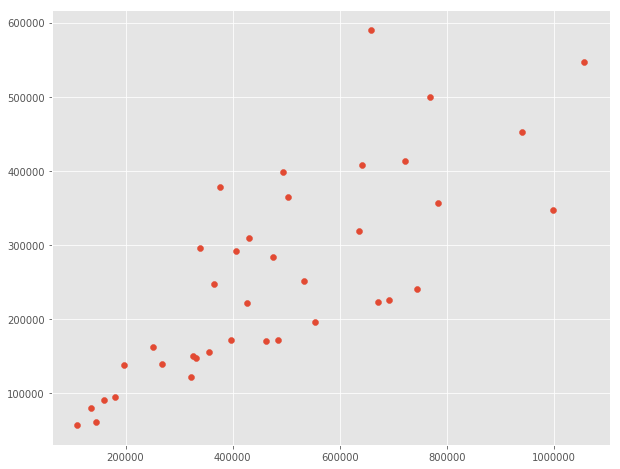

In [235]:
plt.Figure(figsize=(8,9))
plt.scatter(df2['Worker'],df2['Mobile'])
plt.show()

In [236]:
state_list = data['State name'].unique()

In [237]:
len(state_list)

35

In [238]:
df1 = data[data['State name']==state_list[0]]
df = df1[['District name','Agricultural_Workers','Households_with_Telephone_Mobile_Phone_Mobile_only']]
df.rename(columns={'Agricultural_Workers':'Worker','Households_with_Telephone_Mobile_Phone_Mobile_only':'Mobile'},inplace=True)
df.reset_index(inplace=True)

/home/bhumihar/anaconda3/envs/geopandas/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [239]:
df.head()

,index,District name,Worker,Mobile
0,0,Kupwara,56759,53437
1,1,Badgam,36630,65783
2,2,Leh(Ladakh),1645,6331
3,3,Kargil,3763,7733
4,4,Punch,31583,31773


# For Kashmir Region

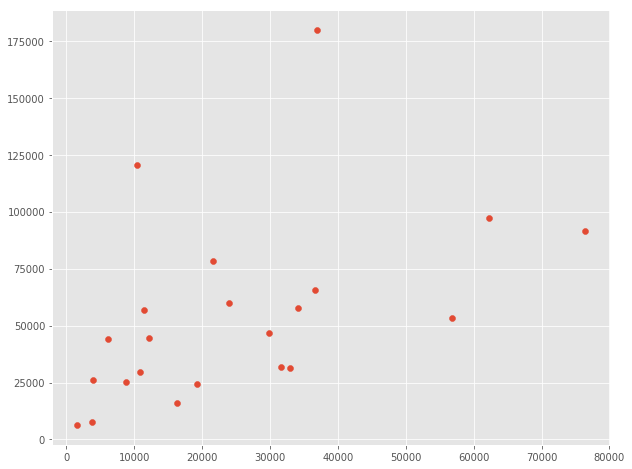

In [240]:
df2 = df.sort_values('Worker',ascending=True)
plt.rcParams['figure.figsize'] = (10, 8)
plt.scatter(df2['Worker'],df2['Mobile'])
plt.show()

In [241]:
df2.head()

,index,District name,Worker,Mobile
2,2,Leh(Ladakh),1645,6331
3,3,Kargil,3763,7733
19,19,Reasi,4009,26081
21,21,Samba,6105,43895
16,16,Ramban,8810,25175


In [242]:
df2['Worker'].corr(df2['Mobile'])

0.46967988447055997

# calculate total number of literate people statewise and plot it on Map

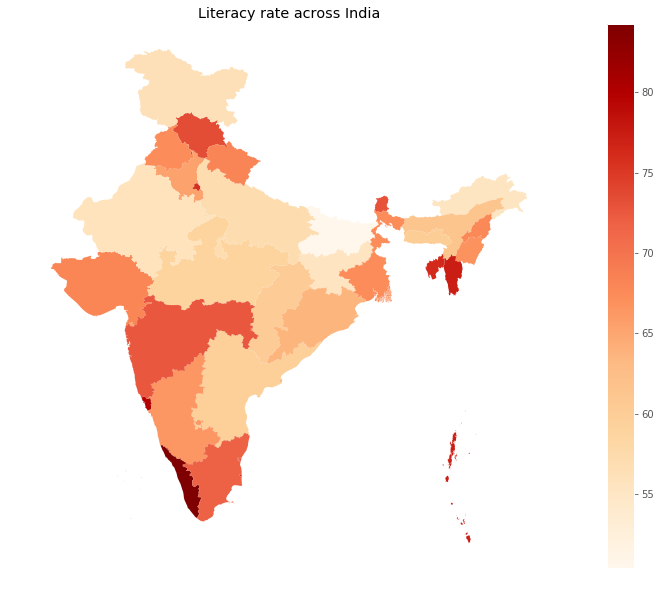

In [243]:
lit_pop = data.groupby('State name')['Literate'].agg('sum')
tot_pop = data.groupby('State name')['Population'].agg('sum')
lit_rate = (lit_pop/tot_pop)*100
india = gpd.read_file('INDIA.shx')
india['lit_rate'] = lit_rate.values
india.plot(column = 'lit_rate', figsize=(20,10),cmap='OrRd',legend=True)
plt.axis('off')
plt.title('Literacy rate across India')
plt.show()

In [244]:
corr_val = []
i=0
for state in state_list : 
    df1 = data[data['State name']==state]
    df = df1[['District name','Agricultural_Workers','Households_with_Telephone_Mobile_Phone_Mobile_only']]
    df.rename(columns={'Agricultural_Workers':'Worker','Households_with_Telephone_Mobile_Phone_Mobile_only':'Mobile'},inplace=True)
    df.reset_index(inplace=True)
    df2 = df.sort_values('Worker',ascending=True)
    print(i,df2.shape[0])
    if df2.shape[0] >1:
        corr_val.append(df2['Worker'].corr(df2['Mobile']))
    else :
        corr_val.append(0.5)
    i +=1

/home/bhumihar/anaconda3/envs/geopandas/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


0 22
1 12
2 20
3 1
4 13
5 21
6 9
7 33
8 71
9 38
10 4
11 16
12 11
13 9
14 8
15 4
16 7
17 27
18 19
19 24
20 30
21 18
22 50
23 26
24 2
25 1
26 35
27 23
28 30
29 2
30 1
31 14
32 32
33 4
34 3


In [245]:
df1 = data[data['State name']==state_list[1]]
df = df1[['District name','Agricultural_Workers','Households_with_Telephone_Mobile_Phone_Mobile_only']]
df.rename(columns={'Agricultural_Workers':'Worker','Households_with_Telephone_Mobile_Phone_Mobile_only':'Mobile'},inplace=True)
df.reset_index(inplace=True)
df2 = df.sort_values('Worker',ascending=True)
df2['Worker'].corr(df2['Mobile'])

/home/bhumihar/anaconda3/envs/geopandas/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


0.93930997910028424

In [246]:
df2.head()

,index,District name,Worker,Mobile
2,24,Lahul & Spiti,572,3100
11,33,Kinnaur,2537,12885
7,29,Bilaspur,4138,47001
5,27,Hamirpur,8824,53918
0,22,Chamba,9193,64850


In [247]:
data[data['State name']=='CHANDIGARH']

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
54,55,CHANDIGARH,Chandigarh,1055450,580663,474787,805438,465346,340092,199086,...,7152,10783,4285,2444,6729,3382,4461,7843,7897,34145


In [248]:
df2['Worker'].corr(df2['Mobile'])

0.93930997910028424

In [249]:
df2.shape[0]

12

In [250]:
s

NameError: name 's' is not defined

In [ ]:
india = gpd.read_file('INDIA.shx')
india['corr'] = corr_val
india.plot(column = 'corr', figsize=(20,10),cmap='Blues',legend=True)
plt.axis('off')
plt.title('corr across India')
plt.show()

In [ ]:
state_list

In [ ]:
df1 = data[data['State name']=='RAJASTHAN']
df = df1[['District name','Agricultural_Workers','Households_with_Telephone_Mobile_Phone_Mobile_only']]
df.rename(columns={'Agricultural_Workers':'Worker','Households_with_Telephone_Mobile_Phone_Mobile_only':'Mobile'},inplace=True)
df.reset_index(inplace=True)
df2 = df.sort_values('Worker',ascending=True)
plt.scatter(df2['Worker'],df2['Mobile'])
plt.show()

In [ ]:
df1 = data[data['State name']=='KARNATAKA']
df = df1[['District name','Agricultural_Workers','Households_with_Telephone_Mobile_Phone_Mobile_only']]
df.rename(columns={'Agricultural_Workers':'Worker','Households_with_Telephone_Mobile_Phone_Mobile_only':'Mobile'},inplace=True)
df.reset_index(inplace=True)
df2 = df.sort_values('Worker',ascending=True)
plt.scatter(df2['Worker'],df2['Mobile'])
plt.show()

In [ ]:
df2['Worker'].corr(df2['Mobile'])

In [ ]:
state_list = list(data['State name'].unique())
corr_val = []
i=0
for state in state_list : 
    df1 = data[data['State name']==state]
    df = df1[['District name','Agricultural_Workers','Households_with_Telephone_Mobile_Phone_Mobile_only']]
    df.rename(columns={'Agricultural_Workers':'Worker','Households_with_Telephone_Mobile_Phone_Mobile_only':'Mobile'},inplace=True)
    df.reset_index(inplace=True)
    df2 = df.sort_values('Worker',ascending=True)
    if df2.shape[0] >1:
        corr_val.append(df2['Worker'].corr(df2['Mobile']))
    else :
        corr_val.append(0.5)
    i +=1


In [ ]:
india = gpd.read_file('INDIA.shx')
india['corr'] = corr_val
india.plot(column = 'corr', figsize=(20,10),cmap='Blues',legend=True)
plt.axis('off')
plt.title('corr across India')
plt.show()

In [ ]:
state_list.index('GUJARAT')

In [ ]:
corr_val[23]

In [ ]:
max(corr_val)

In [ ]:
corr_val.index(1)

In [ ]:
state_list[24]

In [ ]:
state_list[0]

In [ ]:
corr_val[0]

In [ ]:
guj_demography = data[data['State name']=='GUJARAT']
guj_demography = guj_demography[['District name','Hindus','Muslims','Christians','Sikhs','Buddhists','Jains','Others_Religions','Religion_Not_Stated']]

In [ ]:
guj_demography.head()

In [ ]:
guj_demography.rename(columns={'Others_Religions':'Others'},inplace=True)

In [ ]:
guj_demography.head()

In [251]:
## Loading libraries
import pandas as pd    ## for data manipulation
import numpy as np     ## for array and matrices operations
import bokeh   ## For interactive visualizations
import matplotlib.pyplot as plt 
import os
import geopandas as gpd                 # For plotting maps
from bokeh.plotting import figure, show  # For interactive visualization
from bokeh.io import output_notebook

In [255]:
plt.style.use(['ggplot'])
plt.rcParams['figure.figsize']=(10,8)

In [258]:
india = gpd.read_file('INDIA.shp')

In [260]:
india = gpd.read_file('INDIA.shp')

In [261]:
india.head()

,geometry
0,"(POLYGON ((92.898888 12.915831, 92.89917 12.91..."
1,"POLYGON ((83.943192 18.214308, 83.942359999999..."
2,"POLYGON ((94.86086299999999 27.739479, 94.8660..."
3,"POLYGON ((95.59916699999999 27.22961, 95.59008..."
4,"POLYGON ((87.955612 25.53805, 87.952393 25.536..."


In [262]:
india.iloc[0]

geometry    (POLYGON ((92.898888 12.915831, 92.89917 12.91...
Name: 0, dtype: object

In [263]:
list(india.iloc[0])

In [264]:
from shapely.geometry import shape

In [268]:
dist=gpd.read_file('Dist.shx')

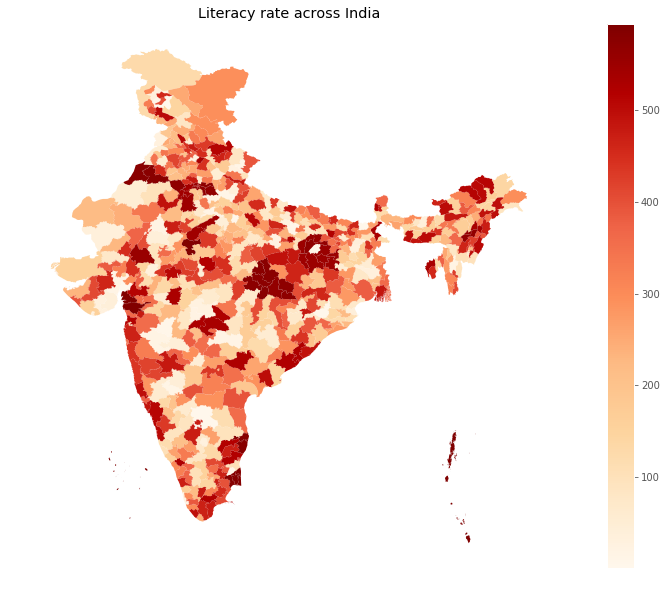

In [274]:
lit_pop = data.groupby('State name')['Literate'].agg('sum')
tot_pop = data.groupby('State name')['Population'].agg('sum')
lit_rate = (lit_pop/tot_pop)*100
dist=gpd.read_file('Dist.shx')
dist['lit_rate'] = [i+1 for i in range(594)]
dist.plot(column = 'lit_rate', figsize=(20,10),cmap='OrRd',legend=True)
plt.axis('off')
plt.title('Literacy rate across India')
plt.show()

In [272]:
lit_rate.count()

35

In [275]:
dist.head()

,geometry,lit_rate
0,(POLYGON ((72.62987258356495 22.81813646338519...,1
1,"POLYGON ((78.14427129024574 14.94529955591942,...",2
2,"POLYGON ((75.63101893959558 34.22268149767631,...",3
3,"POLYGON ((85.39504188800268 21.18470633014217,...",4
4,"POLYGON ((87.64833726061904 26.39292598478003,...",5


In [278]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'